# Airbnb Data Cleaning with Python

### Install libraries

In [2]:
! pip install psycopg2

### Import libraires

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

### Concatenate listing CSV files into a single dataframe

In [4]:
# Read csv files and enusre the four files share the same number of column
df_Syd = pd.read_csv('listings_Sydney.csv', encoding= 'latin-1')
df_Mel = pd.read_csv('listings_Melbourne.csv', encoding= 'latin-1')
df_Bri = pd.read_csv('listings_Brisbane.csv', encoding= 'latin-1')
df_WA = pd.read_csv('listings_WA.csv', encoding= 'latin-1')
print({
    'df_Sydney (rows, columns):' : df_Syd.shape,
    'df_Melbourne (rows, columns):' : df_Mel.shape,
    'df_Brisbane (rows, columns):' : df_Bri.shape,
    'df_WA (rows, columns):' : df_WA.shape
}
    )

{'df_Sydney (rows, columns):': (14274, 75), 'df_Melbourne (rows, columns):': (25087, 75), 'df_Brisbane (rows, columns):': (4684, 75), 'df_WA (rows, columns):': (12521, 75)}


In [5]:
# Create a list to store all listings CSV files
csv_files = [
    'listings_Sydney.csv', 'listings_Melbourne.csv',
    'listings_Brisbane.csv', 'listings_WA.csv'
]

# Read each file into a list of DataFrame
dfs = [pd.read_csv(file, encoding='latin-1') for file in csv_files] 

# Add a location column to each dataFrame
# location = ['Sydney', 'Melborne', 'Brisbane', 'Western Australia']
for i, state in enumerate(['New South Wales', 'Victoria', 'Queensland', 'Western Australia']): 
    dfs[i]['state'] = state   #iterate through the list and add location to each file

# Concatenate DataFrame 
df = pd.concat(dfs, ignore_index=True)

### Step 1: Data Understanding

In [6]:
# Check the total row numbers
df.shape

(56566, 76)

In [7]:
# Set the option to display all columns for exploration (Pandas by default do not show all the columns)
pd.set_option('display.max_columns', None) # None = Set no limit to column display
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,state
0,1.050160e+18,https://www.airbnb.com/rooms/1050164598350388320,2.024030e+13,2024/3/18,city scrape,Self service English breakfast,Close to transport airport older style unit ne...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,211218678,https://www.airbnb.com/users/show/211218678,Paul,2018/8/22,NaN,NaN,a few days or more,20%,0%,f,https://a0.muscache.com/im/pictures/user/f0ef0...,https://a0.muscache.com/im/pictures/user/f0ef0...,NaN,1.0,3.0,"['email', 'phone']",t,t,NaN,Botany Bay,NaN,-33.924060,151.197320,Private room in bed and breakfast,Private room,2,0.5,Half-bath,1.0,1.0,"[""Wifi"", ""Washer"", ""TV"", ""Lock on bedroom door...",$100.00,1,365,1,1,365,365,1.0,365.0,NaN,t,29,59,89,268,2024/3/18,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PID-STRA-61891,f,1,0,1,0,NaN,New South Wales
1,1.096080e+18,https://www.airbnb.com/rooms/1096082243192434668,2.024030e+13,2024/3/18,city scrape,Apartment in Rushcutters Bay,Full 2 bedroom apartment with balcony. Walking...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,26721338,https://www.airbnb.com/users/show/26721338,Anne,2015/1/26,"Sydney, Australia","J'aime voyager, lire, le sport (taekwondo, rando)",within an hour,100%,46%,f,https://a0.muscache.com/im/pictures/user/85034...,https://a0.muscache.com/im/pictures/user/85034...,NaN,2.0,2.0,"['email', 'phone']",t,t,NaN,Sydney,NaN,-33.874830,151.225800,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,2.0,"[""Carbon monoxide alarm"", ""Smoke alarm"", ""Wifi...",$250.00,1,365,1,1,365,365,1.0,365.0,NaN,t,2,18,48,228,2024/3/18,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exempt,f,2,1,1,0,NaN,New South Wales
2,2.167538e+06,https://www.airbnb.com/rooms/2167538,2.024030e+13,2024/3/18,city scrape,"Modern Sydney home near beach,shops",**Availability extremely flexible**<br /><br /...,Queens Park is a safe and friendly neighbourho...,https://a0.muscache.com/pictures/29922910/2399...,11059668,https://www.airbnb.com/users/show/11059668,Sophie,2014/1/6,NaN,"Hi, I am Sophie. We love our house and share m...",within a day,100%,NaN,f,https://a0.muscache.com/im/users/11059668/prof...,https://a0.muscache.com/im/users/11059668/prof...,NaN,1.0,1.0,"['email', 'phone']",t,f,"Queens Park, New South Wales, Australia",Waverley,NaN,-33.895820,151.245490,Entire home,Entire home/apt,5,2.0,2 baths,3.0,3.0,"[""Air conditioning"", ""Dryer"", ""Wifi"", ""Washer""...",$650.00,90,1125,90,90,1125,1125,90.0,1125.0,NaN,t,30,60,90,365,2024/3/18,1,0,0,2015/4/1,2015/4/1,4.00,4.00,4.00,5.00,5.00,5.00,4.00,NaN,f,1,1,0,0,0.01,New South Wales
3,7.906070e+17,https://www.airbnb.com/rooms/790607305500629830,2.024030e+13,2024/3/18,city scrape,Luxury double room,Relax in thi

In [8]:
# Show all columns of the dataframe
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [9]:
# Show data types of each column
df.dtypes

id                                              float64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
state                                            object
Length: 76, dtype: object

### Step 2: Data Preparation

##### Select the columns used for further analysis

In [10]:
df = df[['id', 'listing_url', 
    #'scrape_id', 'last_scraped', 'source', 
    'name', #'description', 'neighborhood_overview', 'picture_url', 
       'host_id', #'host_url', 
       'host_name', 'host_since', #'host_location', # 'host_about',
       #'host_response_time', 
       'host_response_rate', 'host_acceptance_rate',
       #'host_is_superhost', 
       #'host_thumbnail_url', 'host_picture_url',
       #'host_neighbourhood', 'host_listings_count',
       #'host_total_listings_count', #'host_verifications',
       #'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 
       #'neighbourhood_group_cleansed', 
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', #'bathrooms',
       'bathrooms_text', #'bedrooms', 
       'beds', #'amenities', 
       'price',
       'state',
       'minimum_nights', 'maximum_nights', 
       #'minimum_minimum_nights',
       #'maximum_minimum_nights', 'minimum_maximum_nights',
       #'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       #'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', #'calendar_last_scraped', 
       'number_of_reviews', #'number_of_reviews_ltm', 'number_of_reviews_l30d', 
       'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', #'license', 'instant_bookable',
       #'calculated_host_listings_count',
       #'calculated_host_listings_count_entire_homes',
       #'calculated_host_listings_count_private_rooms',
       #'calculated_host_listings_count_shared_rooms', 
       #'reviews_per_month'
       ]].copy()

##### Convert identifier data into string

In [11]:
# Convert 'id' column from float to string with full precision (e.g., id = '1.050160e+18')
df['id'] = df['id'].apply(lambda x: '{:.0f}'.format(x)) # fomat as zero decimal places from a float number
df['id']

0        1050160000000000000
1        1096080000000000000
2                    2167538
3         790607000000000000
4         641106000000000000
                ...         
56561               46254730
56562               17194084
56563     853050000000000000
56564     859618000000000000
56565     778028000000000000
Name: id, Length: 56566, dtype: object

In [12]:
# Convert 'host_id' column from int64 into string
df['host_id'] = df['host_id'].astype(str)
df['host_id']

0        211218678
1         26721338
2         11059668
3        202112801
4        279001183
           ...    
56561    374533008
56562     11349501
56563    120626844
56564    157442856
56565    505442860
Name: host_id, Length: 56566, dtype: object

##### Convert date data into date type

In [13]:
df['host_since'] = pd.to_datetime(df['host_since'])

In [14]:
df['first_review'] = pd.to_datetime(df['first_review'])

In [15]:
df['last_review'] = pd.to_datetime(df['last_review'])

##### Convert percentage data from object to float

In [16]:
# Convert percentage data into float (e.g., 90% -> 0.9) 
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float)/100

In [17]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype(float)/100

##### Extract the number of bathrooms from the 'bathrooms_text' column

In [18]:
# Extract the numeric part and convert it to float
# r: raw string literal; \d+: digit 0-9 ; \.: decimal point; ?: optional (int (2.0) or float (2.5))

df['bathrooms'] = df['bathrooms_text'].str.extract(r'(\d+(\.\d+)?)')[0].astype(float)

In [19]:
# Move the 'num_of_bathrooms' column right next to the 'bathroom_text' column (Insert and Remove)

df.insert(df.columns.get_loc('bathrooms_text') + 1, 'bathrooms', df.pop('bathrooms')) # remove the original column

In [20]:
# \s: matches any white space
# \-: matches the hyphen (e.g., half-bath)
# +: matches one or more characters (e.g., baths, private baths)

df['bathrooms_text'].str.extract(r'([a-zA-Z\s\-]+)')

,0
0,Half-bath
1,bath
2,baths
3,shared bath
4,bath
...,...
56561,private bath
56562,baths
56563,baths
56564,baths


##### Modify the number of bathrooms for half-bath

In [21]:
# Use groupby function to observe the category
grouped_bath = df.groupby(['bathrooms_text']).size()
grouped_bath.tail()

bathrooms_text
9 shared baths         1
9.5 baths              2
Half-bath            155
Private half-bath      6
Shared half-bath      60
dtype: int64

In [22]:
# Filter rows of Half-bath, Private half-bath, and Shared half-bath under the bathrooms_text column
bath_cat = ['Half-bath', 'Private half-bath', 'Shared half-bath']
df[df['bathrooms_text'].isin(bath_cat) & df['bathrooms'].isna()].shape # 155+6+60 = 221  

(221, 35)

In [23]:
# Replace NaN values with 0.5 for the specified bathroom categories
df.loc[df['bathrooms_text'].isin(bath_cat) & df['bathrooms'].isna(), 'bathrooms'] = 0.5

In [24]:
# Filter out the specified bathroom categories to check the result
df[df['bathrooms_text'].isin(['Half-bath','Private half-bath','Shared half-bath'])][['bathrooms', 'bathrooms_text']]

,bathrooms,bathrooms_text
0,0.5,Half-bath
13,0.5,Half-bath
70,0.5,Shared half-bath
394,0.5,Private half-bath
591,0.5,Half-bath
...,...,...
54454,0.5,Half-bath
54467,0.5,Half-bath
55117,0.5,Shared half-bath
55396,0.5,Half-bath


##### Remove the '$' for price

In [25]:
# Show the original price data
df[['price']].head()

,price
0,$100.00
1,$250.00
2,$650.00
3,$84.00
4,$508.00


In [26]:
# Replace $ and , with ''
df['price'] = df['price'].str.replace('$','').str.replace(',','').astype(float)

In [27]:
# Check the data types to confirm they are in the correct format
df.dtypes

id                                     object
listing_url                            object
name                                   object
host_id                                object
host_name                              object
host_since                     datetime64[ns]
host_response_rate                    float64
host_acceptance_rate                  float64
neighbourhood_cleansed                 object
latitude                              float64
longitude                             float64
property_type                          object
room_type                              object
accommodates                            int64
bathrooms_text                         object
bathrooms                             float64
beds                                  float64
price                                 float64
state                                  object
minimum_nights                          int64
maximum_nights                          int64
availability_30                   

##### Rename Columns

In [28]:
df = df.rename(columns= {'neighbourhood_cleansed' : 'neighbourhood' })

##### Remove duplicate values if any

In [29]:
# Get the rows of duplicated data (There is no duplicated data in this dataFrame)
df.loc[df.duplicated()]

,id,listing_url,name,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bathrooms,beds,price,state,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value


##### Observe rows with duplicated host_id

In [30]:
# Get the rows that have duplicated 'host_id' (25527 rows of duplicated host_id)
df.loc[df.duplicated(subset=['host_id'])].shape

(25527, 35)

In [31]:
# Get the subset of 'host_id', 'latitude' and 'longitude' is duplicated
df.loc[df.duplicated(subset=['host_id','latitude','longitude'])].head()

,id,listing_url,name,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bathrooms,beds,price,state,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
518,1010360000000000000,https://www.airbnb.com/rooms/1010362454004916589,Water front - Beautiful View Modern Sydney 3Ro...,318838419,Suzanna,2019-12-18,1.00,1.00,Sydney,-33.859110,151.203030,Entire rental unit,Entire home/apt,8,2 baths,2.0,5.0,249.0,New South Wales,1,365,10,40,70,272,8,2023-11-15,2024-02-21,4.88,4.88,4.75,5.00,5.00,5.00,4.75
1004,17685229,https://www.airbnb.com/rooms/17685229,Iluka Resort Apartments - Poolside,24721535,Beach Stays,2014-12-11,1.00,0.94,Pittwater,-33.599630,151.318910,Entire rental unit,Entire home/apt,6,1.5 baths,1.5,4.0,380.0,New South Wales,2,90,21,45,73,328,17,2017-10-12,2024-02-26,4.29,4.35,4.29,4.88,4.76,4.71,4.06
1107,52520437,https://www.airbnb.com/rooms/52520437,The Milk Bar - Heritage Suite with Balcony,425070402,Neighbourhood By TWT,2021-09-28,1.00,1.00,Waverley,-33.891457,151.245239,Entire serviced apartment,Entire home/apt,2,1 bath,1.0,1.0,189.0,New South Wales,2,90,15,45,75,90,83,2021-10-07,2024-03-09,4.73,4.90,4.78,4.70,4.81,4.81,4.64
1236,27515347,https://www.airbnb.com/rooms/27515347,Conveniently located next to Cronulla Beach,163277099,Kylee,2017-12-19,1.00,0.99,Sutherland Shire,-34.046940,151.153810,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,181.0,New South Wales,1,1125,0,10,18,293,235,2018-08-19,2024-02-24,4.88,4.94,4.92,4.94,4.95,4.94,4.84
1755,821526000000000000,https://www.airbnb.com/rooms/821526439072168412,Brand new super comfortable 1 bed Apt Olympic ...,452931721,Squirrel Zone,2022-04-05,0.99,0.95,Auburn,-33.851327,151.060975,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,160.0,New South Wales,21,365,1,1,29,119,14,2023-03-09,2024-02-25,4.79,4.93,5.00,4.86,4.93,4.93,4.71


In [32]:
# Checking an example using the host_id = 318838419, when 'latitude' and 'longitude' are also duplicated
# keep=False: Return all duplicated rows not just the subsequent
df[df.duplicated(subset=['host_id', 'latitude', 'longitude'], keep=False)] \
    .query('host_id == "318838419"').sort_values(by='id')
    
# The data disctionay defines id as Airbnb's unique identifier for the listing.
# For the host_id = 318838419, there are three rows with same id '1010360000000000000'
# Those are different units for rent based on name and the listings of website

,id,listing_url,name,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bathrooms,beds,price,state,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
413,1010360000000000000,https://www.airbnb.com/rooms/1010360550548066881,Heritage Protected Waterside Workmans Flat 3BR...,318838419,Suzanna,2019-12-18,1.0,1.0,Sydney,-33.859110,151.203030,Entire rental unit,Entire home/apt,8,2 baths,2.0,4.0,276.0,New South Wales,1,365,8,32,56,266,13,2023-11-18,2024-03-03,4.92,4.92,4.85,4.92,5.00,5.00,4.85
518,1010360000000000000,https://www.airbnb.com/rooms/1010362454004916589,Water front - Beautiful View Modern Sydney 3Ro...,318838419,Suzanna,2019-12-18,1.0,1.0,Sydney,-33.859110,151.203030,Entire rental unit,Entire home/apt,8,2 baths,2.0,5.0,249.0,New South Wales,1,365,10,40,70,272,8,2023-11-15,2024-02-21,4.88,4.88,4.75,5.00,5.00,5.00,4.75
11387,1010360000000000000,https://www.airbnb.com/rooms/1010361510595031789,Water front - Balcony & Rooftop Deck The Rocks #7,318838419,Suzanna,2019-12-18,1.0,1.0,Sydney,-33.859106,151.203029,Entire rental unit,Entire home/apt,8,2 baths,2.0,5.0,268.0,New South Wales,1,365,14,44,74,276,13,2023-11-29,2024-02-24,5.00,4.92,5.00,4.85,5.00,4.92,4.85
517,1012810000000000000,https://www.airbnb.com/rooms/1012808280341555371,The Rocks Waterview Balcony Rooftop 3 Bedroom #6,318838419,Suzanna,2019-12-18,1.0,1.0,Sydney,-33.859106,151.203029,Entire rental unit,Entire home/apt,8,2 baths,2.0,6.0,271.0,New South Wales,1,365,14,39,64,274,16,2023-11-21,2024-03-05,4.88,4.94,4.88,5.00,4.94,5.00,4.94
12236,983572000000000000,https://www.airbnb.com/rooms/983571691914909288,Cosy Sydney Water View Historical 3 Bedroom #1A,318838419,Suzanna,2019-12-18,1.0,1.0,Sydney,-33.859106,151.203029,Entire rental unit,Entire home/apt,8,2 baths,2.0,6.0,276.0,New South Wales,1,365,16,42,70,277,26,2023-09-29,2024-03-03,4.69,4.77,4.65,4.96,5.00,4.96,4.69
13959,983590000000000000,https://www.airbnb.com/rooms/983589907935161920,Elegant The Rocks Harbour Water Views 3 Bedroo...,318838419,Suzanna,2019-12-18,1.0,1.0,Sydney,-33.859106,151.203029,Entire rental unit,Entire home/apt,8,2 baths,2.0,6.0,276.0,New South Wales,1,365,6,32,60,264,8,2023-11-23,2024-02-10,5.00,4.88,5.00,5.00,5.00,4.88,5.00


##### Handle missing values

In [33]:
# Get the number of missing values of each column
df.isna().sum()

id                                 0
listing_url                        0
name                               0
host_id                            0
host_name                          2
host_since                         2
host_response_rate             11636
host_acceptance_rate            9830
neighbourhood                      0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                    38
bathrooms                         38
beds                            7698
price                           8165
state                              0
minimum_nights                     0
maximum_nights                     0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
first_review                    8985
l

##### Missing values in the price column

In [34]:
# Get the count of the price at each location with missing values
df[df['price'].isna()].groupby('state').size().reset_index(name='count')

,state,count
0,New South Wales,2
1,Queensland,295
2,Victoria,7188
3,Western Australia,680


In [35]:
# Drop th rows of price with missing values 
df = df.dropna(subset=['price'])

In [36]:
df.shape

(48401, 35)

##### Missing values in the column of 'host_id' and 'host_name'

In [37]:
# Drop rows where host_name is NaN
df = df.dropna(subset=['host_name'])

# This also remove the rows where 'host_since' and 'host_total_listings_count' is NaN

##### Missing values in the bethrooms column

In [38]:
# Get the count of missing values for bathrooms grouped by room type and accommodates
df[df['bathrooms'].isna()].groupby(['room_type', 'accommodates']).size()\
    .reset_index(name='count_of_nan_bathrooms')

,room_type,accommodates,count_of_nan_bathrooms
0,Entire home/apt,5,1
1,Hotel room,2,3
2,Hotel room,4,4
3,Hotel room,6,2
4,Private room,1,3
5,Private room,2,16
6,Private room,6,1
7,Shared room,1,2
8,Shared room,2,1


In [39]:
# Get the mode of bathroom number for each room type and accommodates
# if there is more than one mode, fetch the first mode
df.groupby(['room_type', 'accommodates'])['bathrooms']\
    .apply(lambda x:x.mode().iloc[0] if not x.mode().empty else np.nan)\
    .reset_index(name='bathrooms_mode').head()

,room_type,accommodates,bathrooms_mode
0,Entire home/apt,1,1.0
1,Entire home/apt,2,1.0
2,Entire home/apt,3,1.0
3,Entire home/apt,4,1.0
4,Entire home/apt,5,1.0


In [40]:
# Function to calculate the mode of bathroom numbers
def bathroom_mode(x):
    return x.mode().iloc[0] if not x.mode().empty else np.nan

# Fill the missing values of bathrooms with the calculated mode in the dataFrame
df['bathrooms'] = df.groupby(['room_type', 'accommodates'])['bathrooms'].transform(lambda x: x.fillna(bathroom_mode(x)))

##### Missing values in the number of beds

In [41]:
# Get the mode of bed number for each room type and accommodates
# If there is more than one mode, fetch the first mode
df.groupby(['room_type', 'accommodates'])['beds']\
    .apply(lambda x:x.mode().iloc[0] if not x.mode().empty else np.nan)\
    .reset_index(name='beds_mode').head()

,room_type,accommodates,beds_mode
0,Entire home/apt,1,1.0
1,Entire home/apt,2,1.0
2,Entire home/apt,3,2.0
3,Entire home/apt,4,2.0
4,Entire home/apt,5,3.0


In [42]:
# Function to calculate the mode of bed numbers
def beds_mode(x):
    return x.mode().iloc[0] if not x.mode().empty else np.nan

# Fill the missing values of bathrooms with the calculated mode in the dataFrame
df['beds'] = df.groupby(['room_type', 'accommodates'])['beds'].transform(lambda x: x.fillna(beds_mode(x)))

##### Remove anomolies

In [43]:
# Remove the row with a rating socre of 5.11
df = df[(df['review_scores_rating'] >=0) & (df['review_scores_rating'] <=5)]

### Step 3: Exploratory Data Analysis

##### Pricing

In [44]:
# Get the baisc stats of price
df['price'].describe()

count     41722.000000
mean        301.682901
std        1020.359303
min          17.000000
25%         143.000000
50%         215.000000
75%         332.000000
max      104983.000000
Name: price, dtype: float64

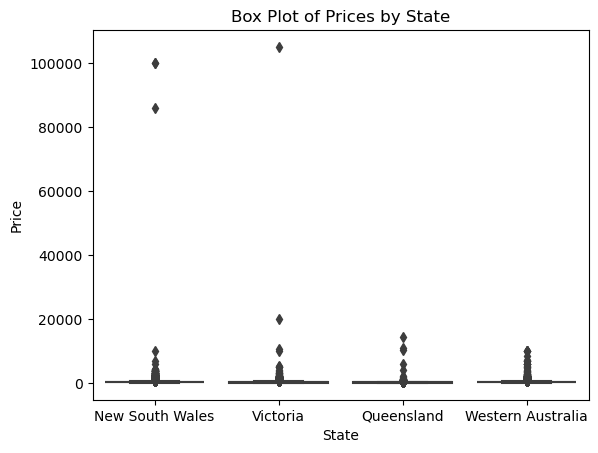

In [45]:
# Plot a boxplot for price categorised by location
sns.boxplot(x='state', y='price', data=df)
plt.title('Box Plot of Prices by State')
plt.xlabel('State')
plt.ylabel('Price')
plt.show()

# The outliers need to be filtered out

In [46]:
# Get the related columns and sort the price in desc
sorted_price = df[['state', 'listing_url','price', 'minimum_nights']]\
    .sort_values(by='price', ascending=False)
sorted_price

# The data dictionary difines the price as dialy price; However, it is not the case.

# Browse the first listing url site and confirm the min nights is 70 
# (the daily price needs to be divided by 70)
# Browse the second listing url site and it is no longer available
# Browse the third listing url site and the min nights is actually 7

,state,listing_url,price,minimum_nights
26156,Victoria,https://www.airbnb.com/rooms/34589429,104983.0,70
11894,New South Wales,https://www.airbnb.com/rooms/1033750031461952874,99999.0,1
11886,New South Wales,https://www.airbnb.com/rooms/1014279860655348802,99999.0,1
4867,New South Wales,https://www.airbnb.com/rooms/912425659845281303,85835.0,3
36962,Victoria,https://www.airbnb.com/rooms/1353588,20000.0,2
...,...,...,...,...
12527,New South Wales,https://www.airbnb.com/rooms/37640162,19.0,333
11267,New South Wales,https://www.airbnb.com/rooms/40897127,19.0,111
6777,New South Wales,https://www.airbnb.com/rooms/38459531,19.0,333
11653,New South Wales,https://www.airbnb.com/rooms/38629693,19.0,333


In [47]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as data points below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 

# Filter out outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Show the updated df with specified columns
df[['state', 'listing_url', 'price', 'minimum_nights']].sort_values(by='price', ascending=False)

,state,listing_url,price,minimum_nights
9824,New South Wales,https://www.airbnb.com/rooms/1032930061439202902,615.0,2
45358,Western Australia,https://www.airbnb.com/rooms/687963644613290784,615.0,3
10991,New South Wales,https://www.airbnb.com/rooms/25042007,615.0,7
53248,Western Australia,https://www.airbnb.com/rooms/953840818548705148,615.0,2
51944,Western Australia,https://www.airbnb.com/rooms/28965243,615.0,2
...,...,...,...,...
12527,New South Wales,https://www.airbnb.com/rooms/37640162,19.0,333
11267,New South Wales,https://www.airbnb.com/rooms/40897127,19.0,111
6777,New South Wales,https://www.airbnb.com/rooms/38459531,19.0,333
11653,New South Wales,https://www.airbnb.com/rooms/38629693,19.0,333


c:\Users\BullWang\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


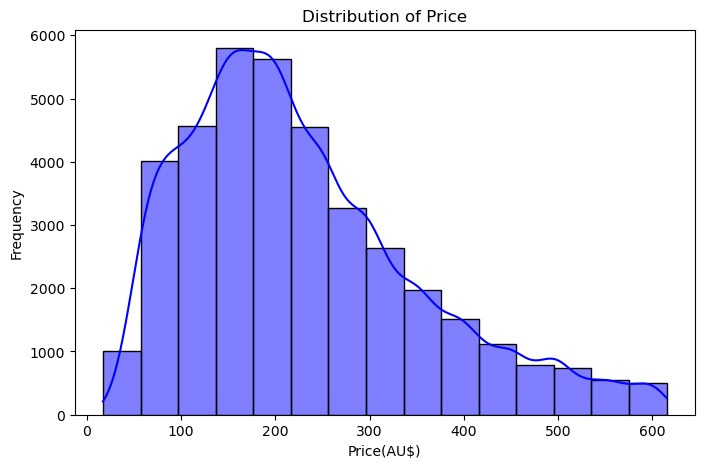

In [48]:
# Plot a histogram to view overall price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True, bins = 15, color= 'blue')
plt.title('Distribution of Price')
plt.xlabel('Price(AU$)')
plt.ylabel('Frequency')
plt.show()

In [49]:
# Calculate the mean values of price for each state and sort them
state_price_mean = df.groupby('state', observed=True)['price'].mean().sort_values(ascending=False)
state_price_mean

state
Western Australia    245.419681
New South Wales      242.017568
Victoria             220.125249
Queensland           182.090399
Name: price, dtype: float64

c:\Users\BullWang\miniconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


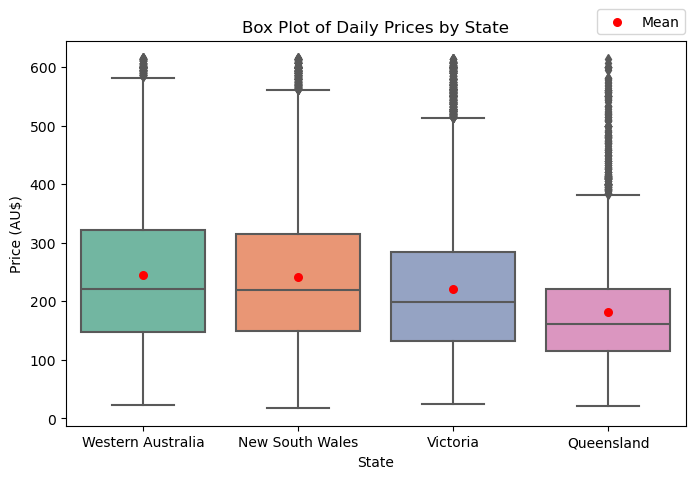

In [50]:
# Set the correct order (corresponding to mean) for the 'state' column in df
df['state'] = pd.Categorical(df['state'], categories=state_price_mean.index, ordered=True)

# Plot boxplot for price_daily categorized by location
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='state', y='price', data=df, palette='Set2')

# Plot the mean values on the boxplot
# ax.scatter(): add points to the plot 
for i, state in enumerate(state_price_mean.index):
    ax.scatter(i, state_price_mean[state], color='red', s=30, \
        label='Mean' if i == 0 else "")  # Show the label name when i=0

plt.title('Box Plot of Daily Prices by State')
plt.xlabel('State')
plt.ylabel('Price (AU$)')
plt.legend(loc='upper right', bbox_to_anchor =(1.01,1.1))
plt.show()

In [51]:
# Get the stats grouped by location
# observed=True increase processing efficiency (only observe the data presented)
df.groupby('state', observed=True)['price'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
Western Australia,9593.0,245.419681,130.521155,23.0,147.0,220.0,321.0,615.0
New South Wales,10701.0,242.017568,128.611459,17.0,149.0,219.0,314.0,615.0
Victoria,14587.0,220.125249,120.725055,24.0,131.0,199.0,284.0,614.0
Queensland,3739.0,182.090399,100.292864,20.0,114.0,161.0,221.5,614.0


##### Host joining trend 

In [52]:
# Extract and create a new column of the year when the host join Airbnb
df['host_since_year'] = df['host_since'].dt.year

# Filter out the year 2024 for plotting as the data is incomplete
df_host_join = df[df['host_since_year'] != 2024]
 
# Count the number of distinct hosts (by host_id) joining each year
host_join_trend = df_host_join.groupby(['host_since_year','state'])['host_id'].nunique()\
    .reset_index(name='count_of_distinct_hosts')

host_join_trend.head()

C:\Users\BullWang\AppData\Local\Temp\ipykernel_28956\2231868929.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  host_join_trend = df_host_join.groupby(['host_since_year','state'])['host_id'].nunique()\


,host_since_year,state,count_of_distinct_hosts
0,2008,Western Australia,1
1,2008,New South Wales,0
2,2008,Victoria,0
3,2008,Queensland,0
4,2009,Western Australia,1


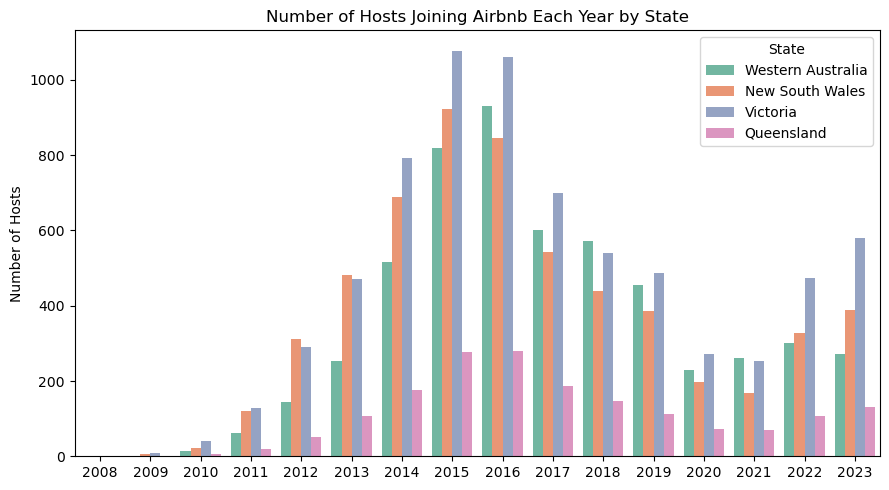

In [86]:
# Plotting Number of Hosts Joining Airbnb Each Year (By location)
plt.figure(figsize=(9,5))
sns.barplot(x='host_since_year', y='count_of_distinct_hosts', \
    data = host_join_trend, hue='state', palette='Set2')
plt.title('Number of Hosts Joining Airbnb Each Year by State')
plt.xlabel('')
plt.ylabel('Number of Hosts')
# plt.xticks(rotation=45)
plt.legend(title='State')
plt.tight_layout()
plt.show()

# The hosts joined Airbnb increased significantly from 2013-2015.
# The figure peaked at 2015 and 2016, depending on the location.
# The figure experienced a sharp decrease from 2017 to 2021.

##### Host response and acceptance rate

In [54]:
# Calculate the average of host reponse rate and acceptance rate
avg_host_response_rate = df['host_response_rate'].mean()
avg_host_acceptance_rate = df['host_acceptance_rate'].mean()
print(f"The average host response rate: {round(avg_host_response_rate * 100, 2)}%.")
print(f"The average host acceptance rate: {round(avg_host_acceptance_rate * 100, 2)}%.")

The average host response rate: 97.01%.
The average host acceptance rate: 90.22%.


In [55]:
# Calculate the host response and acceptance rate based on State
df_res_acc_rate_mean = df.groupby('state')[['host_response_rate', 'host_acceptance_rate']].mean().round(2).reset_index()\
    .sort_values(['host_response_rate', 'host_acceptance_rate'], ascending=False)
df_res_acc_rate_mean

C:\Users\BullWang\AppData\Local\Temp\ipykernel_28956\3246201700.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_res_acc_rate_mean = df.groupby('state')[['host_response_rate', 'host_acceptance_rate']].mean().round(2).reset_index()\


,state,host_response_rate,host_acceptance_rate
0,Western Australia,0.98,0.92
3,Queensland,0.98,0.92
2,Victoria,0.97,0.89
1,New South Wales,0.96,0.89


c:\Users\BullWang\miniconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\BullWang\miniconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


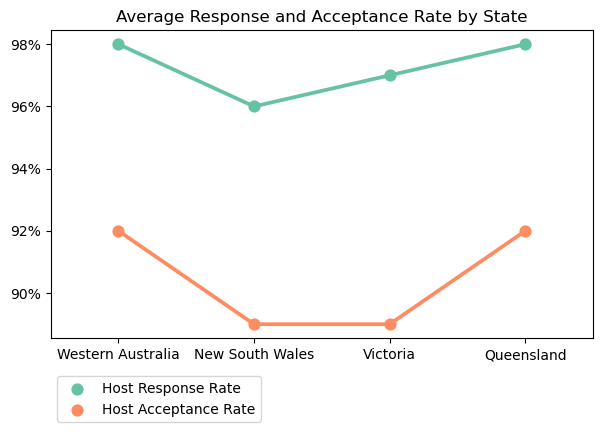

In [100]:
# Melt the dataframe for seaborn plotting
df_res_acc_rate_mean_melted = df_res_acc_rate_mean.melt(id_vars='state', var_name='category', value_name='rate')

# Remove '_' of the legend
df_res_acc_rate_mean_melted['category'] = df_res_acc_rate_mean_melted['category']\
    .apply(lambda x: x.replace('_', ' ')).str.title()

# Define a function to format the y-axis labels as percentages
def to_percent(y, position):
    # Convert to percent and format
    return f'{y*100:.0f}%'

# Plot a point plot to display response and acceptance rate by state
plt.figure(figsize=(7,4))
sns.pointplot(data=df_res_acc_rate_mean_melted, x='state', y='rate', hue='category', palette='Set2')
plt.title('Average Response and Acceptance Rate by State')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))   # Apply the percentage formatter to the y-axis
plt.xlabel('')
plt.ylabel('')
plt.legend(title='', bbox_to_anchor=(0.4,-0.1))
plt.show()

In [57]:
# Understand the num of listings by sate by neighbourhood
df[['state', 'neighbourhood']].value_counts().head(10)

state              neighbourhood         
Victoria           Melbourne                 4871
New South Wales    Sydney                    2464
Victoria           Port Phillip              1532
Western Australia  BUSSELTON                 1030
Victoria           Yarra                      994
New South Wales    Waverley                   923
Victoria           Yarra Ranges               879
                   Stonnington                744
Western Australia  AUGUSTA-MARGARET RIVER     659
New South Wales    Randwick                   589
Name: count, dtype: int64

In [58]:
# Convert 'neighbourhood' to title case
df['neighbourhood'] = df['neighbourhood'].str.title()

In [59]:
df_Queensland = df[df['state'] == 'Queensland']

df_Queensland.groupby(['state', 'neighbourhood']).size().reset_index(name='count')\
    .sort_values('count', ascending=False)

C:\Users\BullWang\AppData\Local\Temp\ipykernel_28956\3355319574.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_Queensland.groupby(['state', 'neighbourhood']).size().reset_index(name='count')\


,state,neighbourhood,count
499,Queensland,South Brisbane,390
414,Queensland,Brisbane City,362
445,Queensland,Fortitude Valley,261
479,Queensland,Newstead - Bowen Hills,168
500,Queensland,Spring Hill,125
...,...,...,...
170,New South Wales,Doolandella,0
169,New South Wales,Deagon,0
168,New South Wales,Darra - Sumner,0
167,New South Wales,Corinda,0


In [60]:
# Rename Brisbane City to Brisbane for consistency
df['neighbourhood'] = df['neighbourhood'].replace('Brisbane City', 'Brisbane')

In [61]:
# Ceate a dataframe in which the neighbourhood column shows the CBD in all states
df_CBD = df[df['neighbourhood'].isin(['Sydney','Melbourne', 'Brisbane', 'Perth'])]

# Create a table group by neighbourhood and host response and acceptance rate
df_CBD.groupby('neighbourhood')[['host_response_rate', 'host_acceptance_rate']]\
    .mean().round(2).sort_values(['host_response_rate', 'host_acceptance_rate'], ascending=False)
    

,host_response_rate,host_acceptance_rate
neighbourhood,,
Brisbane,0.98,0.95
Melbourne,0.97,0.91
Sydney,0.97,0.91
Perth,0.97,0.90


In [62]:
df.columns

Index(['id', 'listing_url', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_rate', 'host_acceptance_rate', 'neighbourhood',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bathrooms', 'beds', 'price', 'state',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_since_year'],
      dtype='object')

In [63]:
# Store the top host/listing factors into a list
top_host_factors = ['host_response_rate', 'host_acceptance_rate', 'review_scores_rating']

# Fetch the top 10 hosts/listings based on the specified factors
# Many listings have 100% response and acceptance rate as well as 5 star rating;
# The top listings are those with the most number of reviews
Top_10_host = df[['host_id', 'host_name', 'state', 'neighbourhood','listing_url', 'price']+top_host_factors]\
    .sort_values(by=top_host_factors, ascending=False).head(10).reset_index(drop=True)

Top_10_host

,host_id,host_name,state,neighbourhood,listing_url,price,host_response_rate,host_acceptance_rate,review_scores_rating
0,94913356,Hallan,New South Wales,Parramatta,https://www.airbnb.com/rooms/1060359139441389304,59.0,1.0,1.0,5.0
1,556961418,Marina,New South Wales,Hornsby,https://www.airbnb.com/rooms/1070571681701849023,414.0,1.0,1.0,5.0
2,317303818,Judith,New South Wales,The Hills Shire,https://www.airbnb.com/rooms/40810359,274.0,1.0,1.0,5.0
3,369908172,Hyun,New South Wales,Blacktown,https://www.airbnb.com/rooms/993812349767206370,424.0,1.0,1.0,5.0
4,82568798,Evette,New South Wales,Canterbury,https://www.airbnb.com/rooms/1037390653835404948,367.0,1.0,1.0,5.0
5,130710874,Jane,New South Wales,Randwick,https://www.airbnb.com/rooms/1049609915903416070,343.0,1.0,1.0,5.0
6,25335674,Jarmo,New South Wales,Manly,https://www.airbnb.com/rooms/11743252,265.0,1.0,1.0,5.0
7,80879014,Stella,New South Wales,Lane Cove,https://www.airbnb.com/rooms/653207075847736138,79.0,1.0,1.0,5.0
8,47054360,Amber,New South Wales,Sutherland Shire,https://www.airbnb.com/rooms/21506033,350.0,1.0,1.0,5.0
9,47054360,Amber,New South Wales,Sutherland Shire,https://www.airbnb.com/rooms/1046712532195558065,300.0,1.0,1.0,5.0


In [64]:
# Calculate the average review score rating
avg_score_rating = df['review_scores_rating'].mean().round(2)

# Store the top host/listing factors into a list
# Define the top hosts/listings are those with most reviews and with rating scores higher than average
top_host_factors_1 = ['number_of_reviews', 'review_scores_rating'] # switch the sorting order
df_above_avg = df[df['review_scores_rating']> avg_score_rating]

Top_10_host_1 = df_above_avg[top_host_factors_1 + ['host_name', 'state', 'price', 'review_scores_accuracy',
                                'review_scores_cleanliness', 'review_scores_checkin', 
                                'review_scores_communication', 'review_scores_location',
                            'review_scores_value']]\
    .sort_values(by=top_host_factors_1, ascending=False).head(10).reset_index(drop=True)

Top_10_host_1


,number_of_reviews,review_scores_rating,host_name,state,price,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1072,4.89,Beverley And Michael,New South Wales,99.0,4.93,4.91,4.92,4.97,4.90,4.90
1,1007,4.80,Rachael,Western Australia,112.0,4.86,4.84,4.89,4.91,4.82,4.84
2,973,4.78,Te-NeeleAndKane,Western Australia,104.0,4.89,4.86,4.90,4.87,4.78,4.75
3,968,4.93,Bruce,Victoria,97.0,4.96,4.92,4.98,4.97,4.96,4.90
4,932,4.74,Flasta,Queensland,191.0,4.80,4.71,4.89,4.90,4.89,4.78
5,812,4.83,Debra,Western Australia,209.0,4.89,4.83,4.95,4.95,4.91,4.85
6,811,4.90,Tess,Queensland,158.0,4.94,4.93,4.96,4.96,4.92,4.88
7,792,4.84,Margaret,Western Australia,435.0,4.87,4.81,4.97,4.96,4.98,4.77
8,786,4.84,Ollie,New South Wales,162.0,4.84,4.79,4.94,4.94,4.93,4.81
9,785,4.94,Ian,Victoria,75.0,4.94,4.91,4.98,4.99,4.89,4.94


##### Reviews and Ratings

c:\Users\BullWang\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


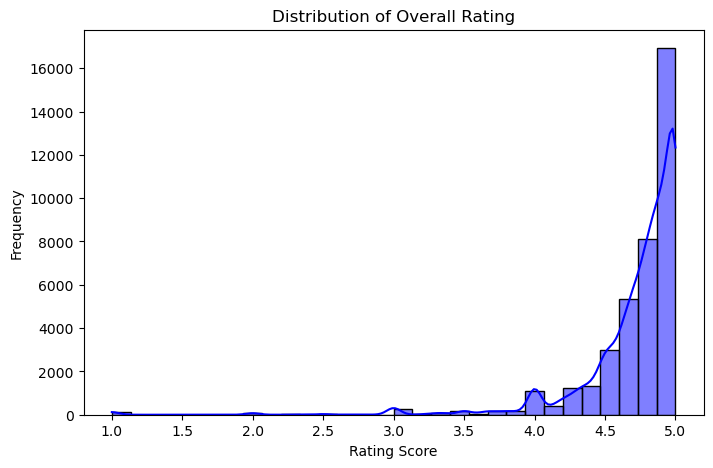

In [101]:
# Plot a histogram to view overall price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['review_scores_rating'], kde=True, bins = 30, color= 'blue')
plt.title('Distribution of Overall Rating')
plt.xlabel('Rating Score')
plt.ylabel('Frequency')
plt.show()

In [66]:
# Store rating-related columns into a list
reviews = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']

# Calculate the mean review scores by state
df_state_rt_mean = df.groupby('state')[reviews].mean().round(2).reset_index()\
    .sort_values('review_scores_rating', ascending=False)
df_state_rt_mean

C:\Users\BullWang\AppData\Local\Temp\ipykernel_28956\2883254117.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_state_rt_mean = df.groupby('state')[reviews].mean().round(2).reset_index()\


,state,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,Western Australia,4.77,4.80,4.75,4.87,4.86,4.84,4.68
3,Queensland,4.73,4.78,4.70,4.78,4.84,4.81,4.68
1,New South Wales,4.70,4.74,4.66,4.81,4.83,4.80,4.61
2,Victoria,4.70,4.74,4.67,4.76,4.80,4.81,4.64


In [67]:
# Melt (unpivot) the DataFrame to long format for seaborn plotting
df_state_rt_mean_melted = df_state_rt_mean.melt(id_vars=['state'], var_name='review_category', value_name='score')
df_state_rt_mean_melted.head()

,state,review_category,score
0,Western Australia,review_scores_rating,4.77
1,Queensland,review_scores_rating,4.73
2,New South Wales,review_scores_rating,4.70
3,Victoria,review_scores_rating,4.70
4,Western Australia,review_scores_accuracy,4.80


c:\Users\BullWang\miniconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\BullWang\miniconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


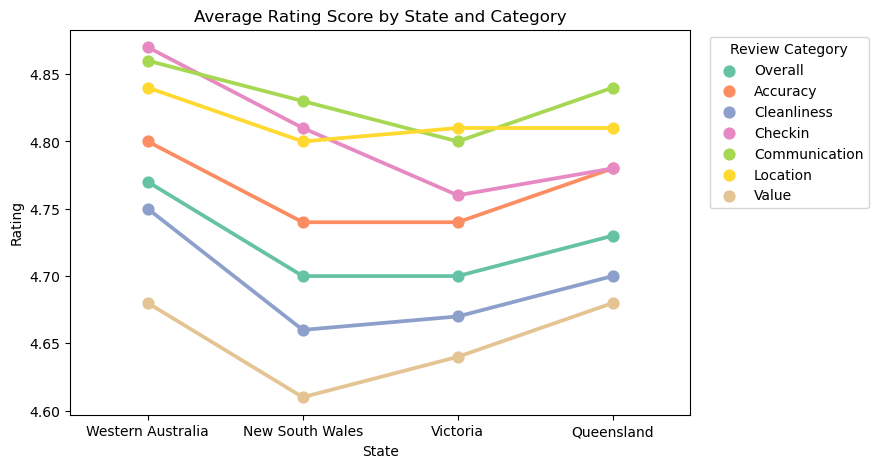

In [111]:
# Replace 'review_scores_rating' with 'review_scores_Overall' in the review_category column
df_state_rt_mean_melted['review_category'] = df_state_rt_mean_melted['review_category'].replace('review_scores_rating', 'review_scores_Overall')

# Extract last word from review categories
df_state_rt_mean_melted['review_category'] = df_state_rt_mean_melted['review_category'].apply(lambda x: x.split('_')[-1]).str.title()

# Create the point plot
plt.figure(figsize=(8, 5))
sns.pointplot(x='state', y='score', hue='review_category', data=df_state_rt_mean_melted, palette='Set2')
plt.title('Average Rating Score by State and Category')
plt.xlabel('State')
plt.ylabel('Rating')
plt.legend(title='Review Category', bbox_to_anchor=(1.02, 1), loc='upper left')


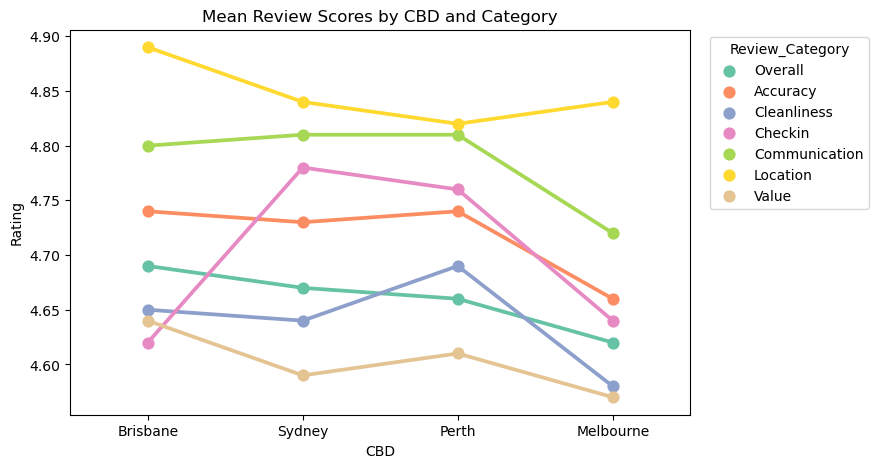

In [110]:
# Calculate the mean review scores by neighbourhood
df_cbd_rt_mean = df_CBD.groupby('neighbourhood')[reviews].mean().round(2).reset_index()\
    .sort_values('review_scores_rating', ascending=False)

# Melt (unpivot) the DataFrame to long format for seaborn plotting
df_cbd_rt_mean_melted = df_cbd_rt_mean.melt(id_vars=['neighbourhood'], var_name='review_category', value_name='score')

# Replace 'review_scores_rating' with 'review_scores_Overall' in the review_category column
df_cbd_rt_mean_melted['review_category'] = df_cbd_rt_mean_melted['review_category'].replace('review_scores_rating', 'review_scores_Overall')

# Extract last word from review categories
df_cbd_rt_mean_melted['review_category'] = df_cbd_rt_mean_melted['review_category'].apply(lambda x:x.split('_')[-1]).str.title()

# Plot the point chart by CBD and review scores
plt.figure(figsize=(8,5))
sns.pointplot(data=df_cbd_rt_mean_melted, x='neighbourhood', y='score', hue='review_category', palette='Set2')
plt.title("Mean Review Scores by CBD and Category")
plt.xlabel('CBD')
plt.ylabel('Rating')
plt.legend(title='Review_Category', bbox_to_anchor=(1.02,1), loc= 'upper left')
plt.show()

In [70]:
# Store all factors for being top listings into a list
factors = ['host_response_rate', 'host_acceptance_rate', 'availability_30', 'availability_60',\
       'availability_90', 'availability_365', 'review_scores_rating']

# Count the number of listings according to the factors
df.groupby(factors).size().reset_index(name='count')\
    .sort_values(by=factors,ascending=[False,False,True,True,True,True,False])
    
# 92 listings are considered top listings

,host_response_rate,host_acceptance_rate,availability_30,availability_60,availability_90,availability_365,review_scores_rating,count
23637,1.0,1.0,0,0,0,0,5.00,92
23636,1.0,1.0,0,0,0,0,4.99,5
23635,1.0,1.0,0,0,0,0,4.98,10
23634,1.0,1.0,0,0,0,0,4.97,8
23633,1.0,1.0,0,0,0,0,4.96,15
...,...,...,...,...,...,...,...,...
106,0.0,0.0,30,60,90,365,3.33,1
105,0.0,0.0,30,60,90,365,2.50,1
104,0.0,0.0,30,60,90,365,2.00,1
103,0.0,0.0,30,60,90,365,1.50,1


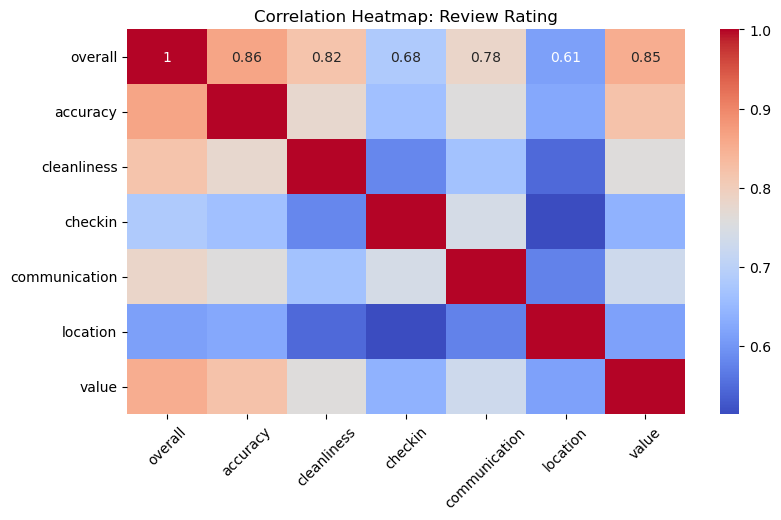

In [123]:
# Specify only the review-related columns
df_reviews = df[reviews]

# Compute correlation metrix
df_reviews_corr = df_reviews.corr()

# Replace 'review_scores_rating' with 'review_scores_Overall' in the index and column
df_reviews_corr.index = df_reviews_corr.index.str.replace('review_scores_rating', 'review_scores_overall')
df_reviews_corr.columns = df_reviews_corr.columns.str.replace('review_scores_rating', 'review_scores_overall')
# Extract only the category item
df_reviews_corr.index = df_reviews_corr.index.str.replace('review_scores_', '')
df_reviews_corr.columns = df_reviews_corr.columns.str.replace('review_scores_', '')

# Plot the review correlation heat map
plt.figure(figsize=(9,5))
sns.heatmap(df_reviews_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Review Rating')
plt.xticks(rotation=45)
plt.show()

In [72]:
df.groupby('property_type').size().reset_index(name='count')\
    .sort_values('count', ascending=False).head(10)

,property_type,count
21,Entire rental unit,15922
18,Entire home,7446
50,Private room in home,4167
57,Private room in rental unit,1321
17,Entire guesthouse,1291
16,Entire guest suite,1149
14,Entire condo,1012
23,Entire townhouse,752
22,Entire serviced apartment,651
15,Entire cottage,619


##### Feature relationship understanding

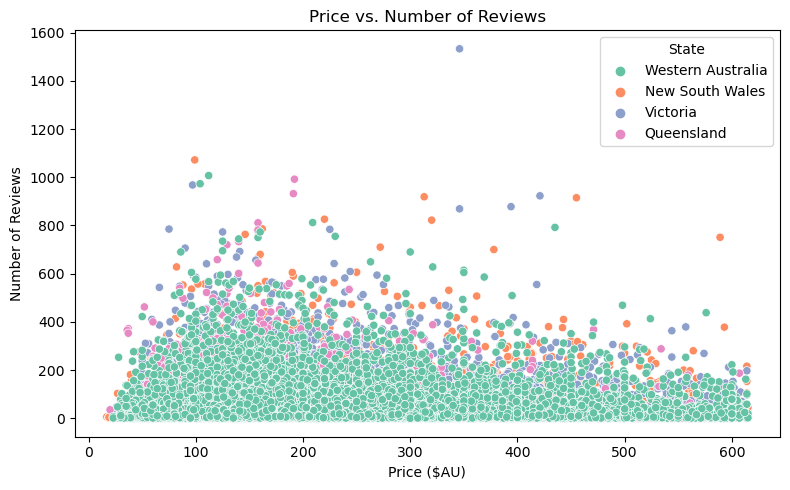

In [124]:
# Scatter plot for Price vs. Number of Reviews
plt.figure(figsize=(8,5))
sns.scatterplot(x='price', y='number_of_reviews', \
                data=df, hue='state', palette='Set2')
plt.title('Price vs. Number of Reviews')
plt.xlabel('Price ($AU)')
plt.ylabel('Number of Reviews')
plt.legend(title='State')
plt.tight_layout()  # Adjust layout to prevent overlapping labels

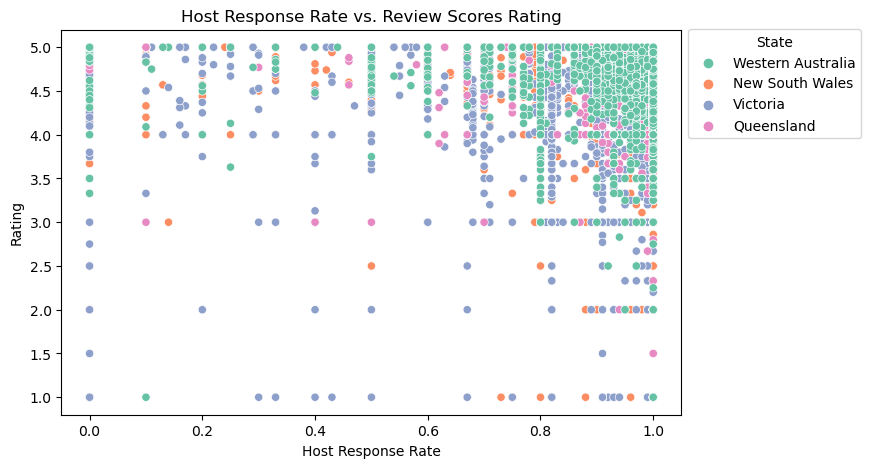

In [126]:
# Host Response Rate vs. Review Scores Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x='host_response_rate', y='review_scores_rating', \
                data=df, hue='state', palette='Set2')
plt.title('Host Response Rate vs. Review Scores Rating')
plt.xlabel('Host Response Rate')
plt.ylabel('Rating')
plt.legend(title='State', bbox_to_anchor=(1,0.7), loc='lower left')
plt.show()

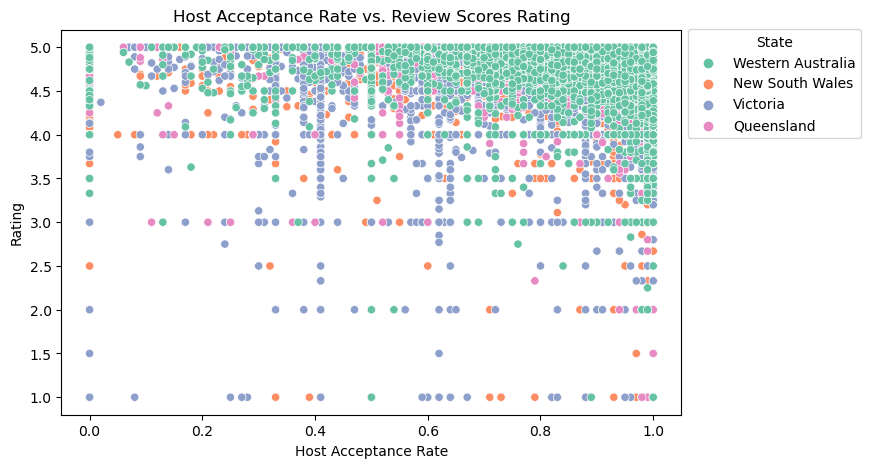

In [127]:
# Host Response Rate vs. Review Scores Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x='host_acceptance_rate', y='review_scores_rating', \
                data=df, hue='state', palette='Set2')
plt.title('Host Acceptance Rate vs. Review Scores Rating')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Rating')
plt.legend(title='State', bbox_to_anchor=(1,0.7), loc='lower left')
plt.show()

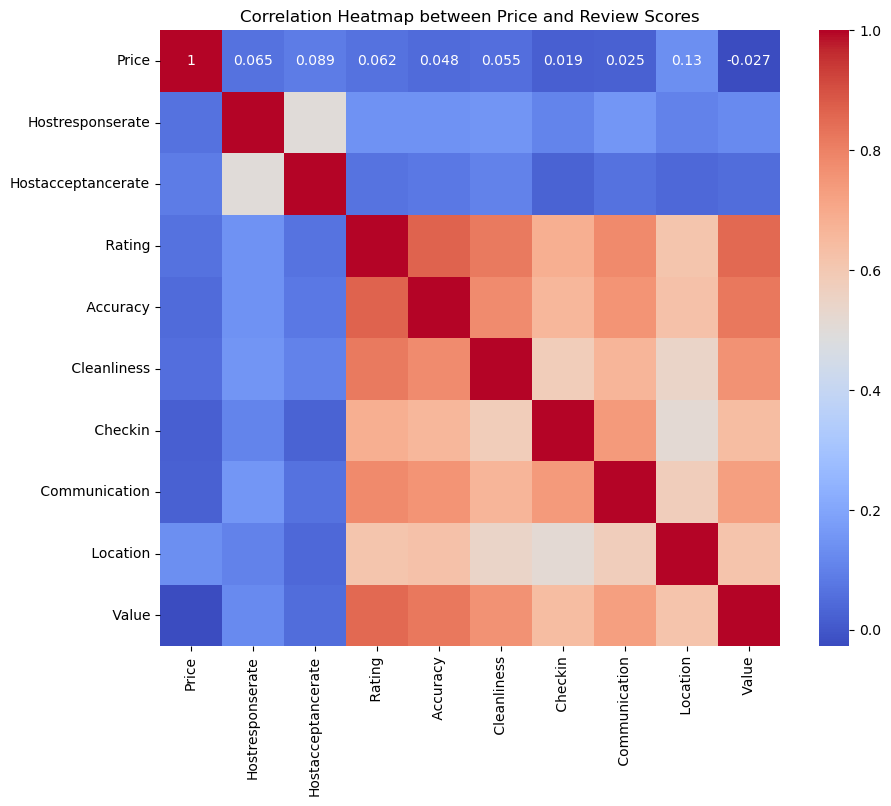

In [76]:
cols = ['price','host_response_rate','host_acceptance_rate',]\
        + ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value']

df_selected = df[cols]

# Compute the correlation matrix
df_corr = df_selected.corr()

# Replace labels for clarity
df_corr.index = df_corr.index.str.replace('review_scores_', ' ').str.title()
df_corr.columns = df_corr.columns.str.replace('review_scores_', ' ').str.title()
df_corr.index = df_corr.index.str.replace('_', '').str.title()
df_corr.columns = df_corr.columns.str.replace('_', '').str.title()


# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Price and Review Scores')
plt.show()

### Write the cleaned dataframe into a CSV file

In [77]:
df.groupby('state', observed=True).size()

state
Western Australia     9593
New South Wales      10701
Victoria             14587
Queensland            3739
dtype: int64

In [78]:
# Write the dataframe to a csv file without index
df.to_csv('Airbnb_au_listing_cleaned',  index=False)